# Pong - Problem Analysis and EDA

## Problem Analysis

In [19]:
import gymnasium as gym
import ale_py

gym.register_envs(ale_py)
env = gym.make('ALE/Pong-v5')

print("Observation space:")
print(env.observation_space.shape)
print("\nAction space:")
print(env.action_space)

Observation space:
(210, 160, 3)

Action space:
Discrete(6)


In [5]:
%run src/collect_eda_data.py

Creating dataset at: /Users/jollyjerr/code/@school/pong/data/eda.h5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [04:52<00:00, 58.58s/it]

Done.


## EDA

Dataset shape:
<KeysViewHDF5 ['actions', 'episode_boundaries', 'observations', 'rewards', 'terminated', 'truncated']>

Total number of frames collected: 4362
Total number of episodes collected: 5

Minimum episode length: 783
Maximum episode length: 1000
Mean episode length: 872.40
Median episode length: 843.0
Standard deviation of episode lengths: 76.22


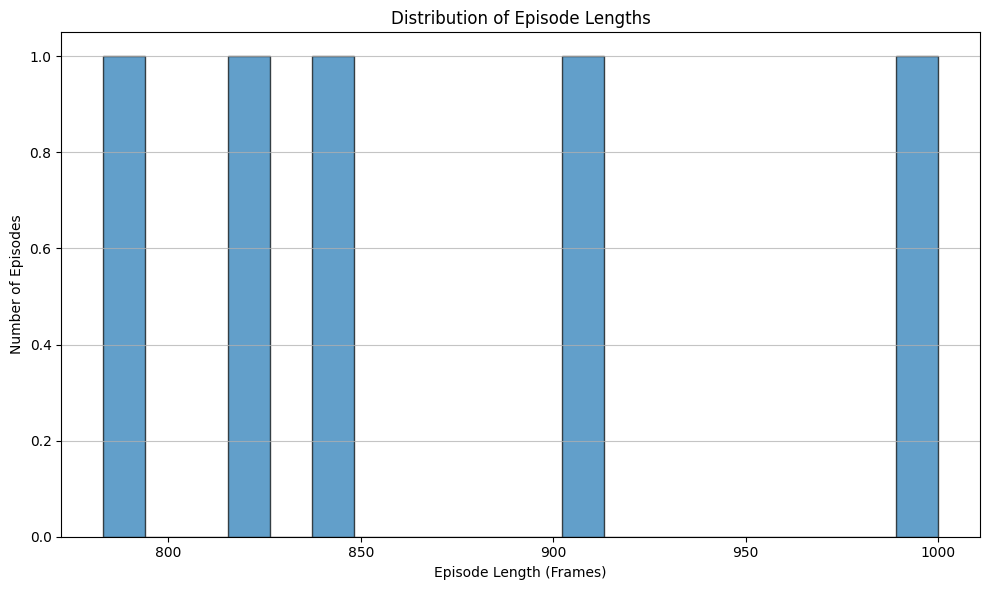

In [13]:
import h5py
import os 
import numpy as np
import matplotlib.pyplot as plt

file_path = os.path.join(os.getcwd(), 'data/eda.h5')

with h5py.File(file_path, 'r') as f:
    print("Dataset shape:")
    print(f.keys())

    total_frames = f['observations'].shape[0]
    print(f"\nTotal number of frames collected: {total_frames}")

    episode_boundaries = f['episode_boundaries'][:]
    num_episodes = episode_boundaries.shape[0]
    print(f"Total number of episodes collected: {num_episodes}")

    episode_lengths = []
    for start_idx, end_idx in episode_boundaries:
        episode_lengths.append(end_idx - start_idx + 1)

    print(f"\nMinimum episode length: {np.min(episode_lengths)}")
    print(f"Maximum episode length: {np.max(episode_lengths)}")
    print(f"Mean episode length: {np.mean(episode_lengths):.2f}")
    print(f"Median episode length: {np.median(episode_lengths)}")
    print(f"Standard deviation of episode lengths: {np.std(episode_lengths):.2f}")

    plt.figure(figsize=(10, 6))
    plt.hist(episode_lengths, bins=20, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Episode Lengths')
    plt.xlabel('Episode Length (Frames)')
    plt.ylabel('Number of Episodes')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

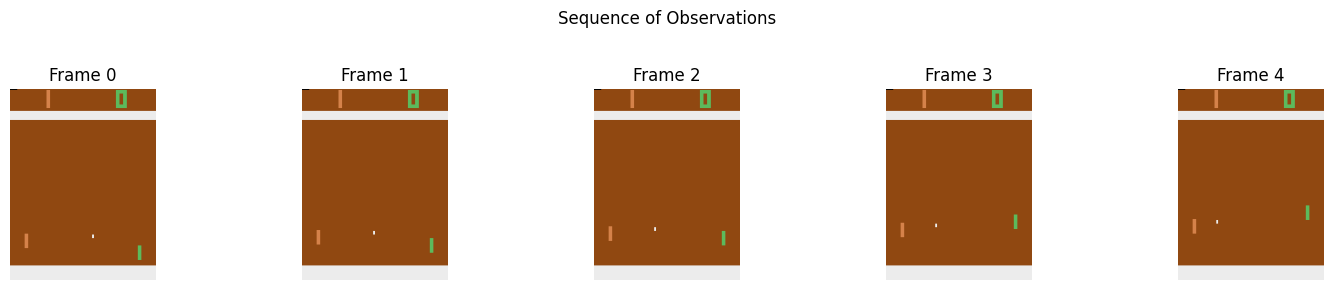

In [25]:
with h5py.File(file_path, 'r') as f:
    sample_episode_idx = 0
    sequence_start_idx = 100
    num_frames_to_show = 5

    fig, axes = plt.subplots(1, num_frames_to_show, figsize=(15, 3))
    for i in range(num_frames_to_show):
        axes[i].imshow(f['observations'][sequence_start_idx + i])
        axes[i].set_title(f"Frame {i}")
        axes[i].axis('off')
    plt.suptitle(f"Sequence of Observations")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()